Step by step process:

1. Problem Statement
2. Hypothesis Generation
3. Loading Packages and Data
4. Data Structure and Content
5. Exploratory Data Analysis
    - Univariate
    - Bivariate
6. Missing Value Treatment
7. Feature Engineering
8. Encoding Categorical variables
    - Label Encoding
    - One Hot Encoding
9. Preprocess Data
10. Modelling
    - Linear Regression
    - Regularised Linear Regression
    - Random Forest
    - XGBoost
11. Summary

UsefulLinks :Value_counts() : https://towardsdatascience.com/valuable-data-analysis-with-pandas-value-counts-d87bbdf42f79  
             dataframe : https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

# Hypothesis Generation

- Important steps of Machine Learning Process
- It involves understanding the problem in detail and by brainstorming as many factor as possible which can impact the outcome
- It is done by understanding Problem Statement thoroughly and before looking at the data

In [1]:
from IPython.display import Image
Image(filename='Hypothesis.jpg')

# Libraries and Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Python\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#reading big mart sales data
data = pd.read_csv('train_data.csv')
#test_data =  pd.read_csv('test_data.csv')

In [4]:
#looking at the first five rows of data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#types of data
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 1. Object: Object datatypes means variable are categorical. Categorical variables in our dataset are : Item_Fat_content,Item_Type,Outlet_Identifier,Outlet_size,Outlet_Location_Type,Outlet_Type
 2. Float64 : It represents the variable which have decimal value. Numerical varibles in our datasets are: Item_Weight,Item_Visibility,Item_MRP and finally Target variable Item_Outlet_Sales
 3. Int64 : Its represents integer format. Outlet_Establishment year in this format

In [6]:
#reading the tst dataset
test = pd.read_csv("test_data.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## 1 Distribution of Target variable

In [7]:
# Read out target variable
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Item Outlet Sales')

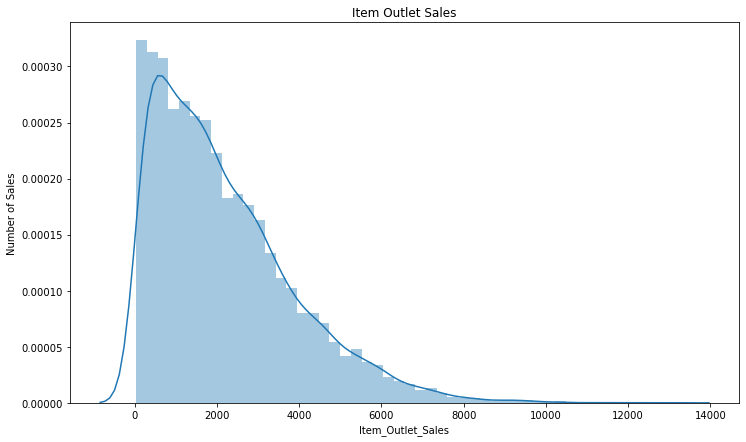

In [8]:
plt.figure(figsize=(12,7))
sns.distplot(data['Item_Outlet_Sales'])
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Number of Sales')
plt.title('Item Outlet Sales')

In [9]:
print("Skew is : ",data.Item_Outlet_Sales.skew())
print("Kurtosis : %f" % data.Item_Outlet_Sales.kurt())

Skew is :  1.1775306028542798
Kurtosis : 1.615877


Observation : Target variable is right skewed and need to normalize

## 1.2 Numerical Predictors

In [10]:
num_features = data.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

Observation : Out of 12 we have 5 numeric variables

### 1.2.1 Correlation between numeric and target variables

In [11]:
corr = num_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [12]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

Observation : As we can see, 

1. Item_MRP has most correlation with target variable and Item_visibility has least
2. Item_visibility expected to have high impact, but it contradicts out initial hypothesis and need further investigation

## 1.2 Categorical Predictors


### 1.2.1 Distribution of variable Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

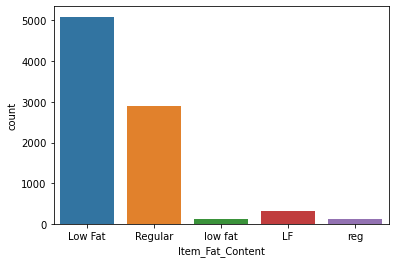

In [13]:
sns.countplot(data.Item_Fat_Content)

---

***We can see that the categories `Low Fat`, `LF` and `low fat` are same and also `Regular`, `reg` are same. So to keep the data clean we will map all these to only two categories to `LF` and `R` using the map function. Let's see how?***

In [14]:
#create the mapping dictionary
mapping = {
    'Low Fat' : 'LF',
    'LF' : 'LF',
    'low fat' : 'LF',
    'reg' : 'Reg',
    'Regular' : 'Reg'
}
data.Item_Fat_Content = data.Item_Fat_Content.map(mapping)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

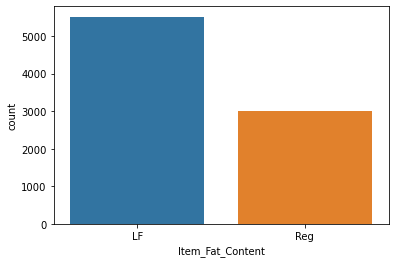

In [15]:
sns.countplot(data.Item_Fat_Content)

### 1.2.2 Distribution of variable Item_type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

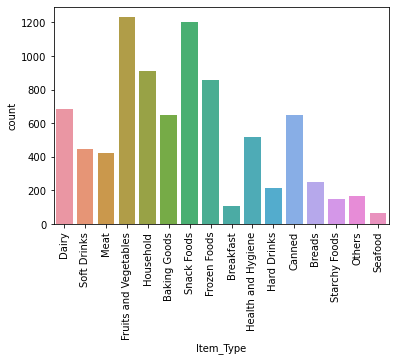

In [16]:
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

Observation : Item_Type have 16 different categorical variables and if possible we must try to reduce it

### 1.2.3 Distribution of variable Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

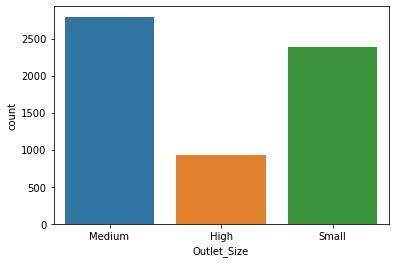

In [17]:
sns.countplot(data.Outlet_Size)

Observation : Very less number of outlets have high size. Its interesting to see, how it relates to our target variable

### 1.2.4 Distribution of variable : Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

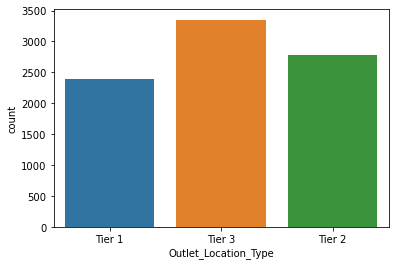

In [18]:
sns.countplot(data.Outlet_Location_Type)

Observation : Big Mart is a brand of Small and Medium size cities as compared to densely populated cities

### 1.2.5 Distribution of variable Outlet_Type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

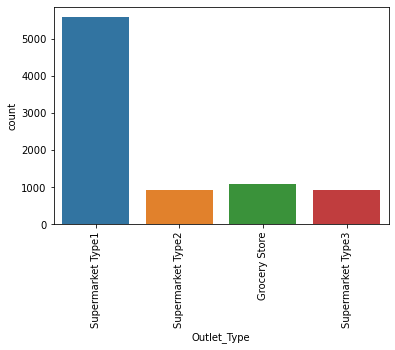

In [19]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=90)

Observation : Except from Supermarket Type 1, other category have very low number of stores and can be clubbed into single entity